# Dissecting the code: Seaborn heatmap

## Importing the library

In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the data from seaborn pre-instored datasets

In [28]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


There are about 18 arguments in the seaborn heatmap function

#### Doing a basic correlation matrix of your data frame

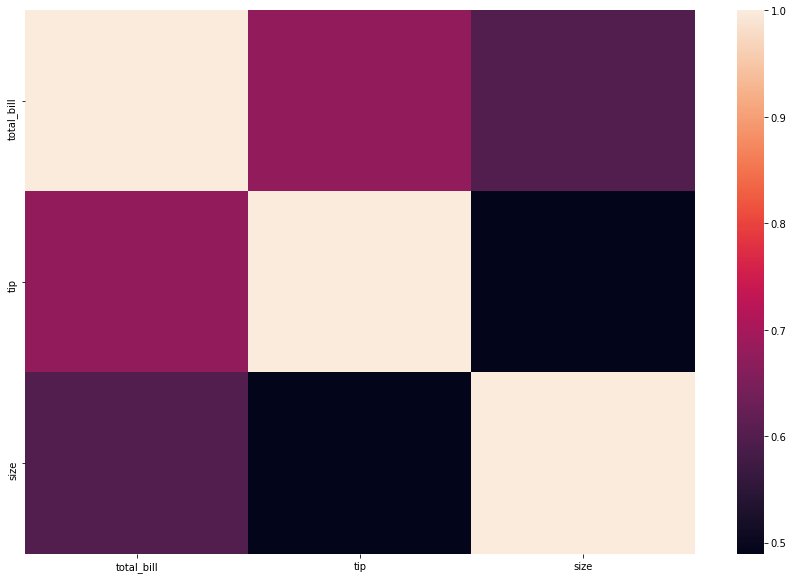

In [29]:
#Using the correlation method
sns.heatmap(tips_df.corr())

#### and using the annotation argument

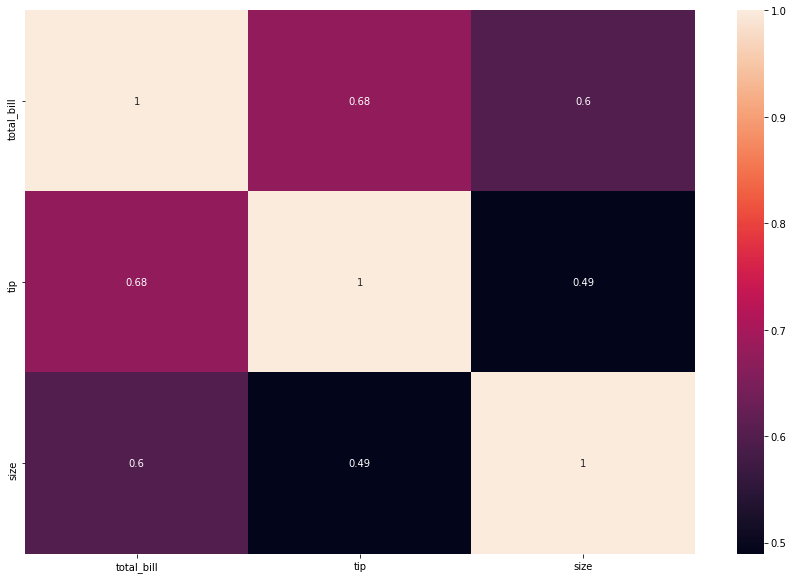

In [30]:
#and using the annotation argument
sns.heatmap(tips_df.corr(), annot=True)

## Understanding the data component

In [31]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


## Data Cleaning & Feature Engineering
- Changing the data types
- Checking the categories to a dummy variable so as to get only numeric vaules

 Selecting all the category columns 

In [32]:
cat_list = tips_df.select_dtypes(include='category').columns.to_list()
cat_list

['sex', 'smoker', 'day', 'time']

Putting all the category columns in a list(using list comprehension except the day column because it has more than two unique variables.

In [33]:
new_cat = [i for i in cat_list if not i == 'day']
new_cat

['sex', 'smoker', 'time']

To create a list of lists for each of the variables in each category column

In [34]:
great_list = []
for i in new_cat:
  new_list = tips_df[i].unique().to_list()
  great_list.append(new_list)

great_list

[['Female', 'Male'], ['No', 'Yes'], ['Dinner', 'Lunch']]

Using a for-loop to create a new column  that has the binary numbers (dummy variables of all the columns in the new_cat list.

In [0]:
count = 0
for i in new_cat:
    tips_df[i+'_num'] = np.where(tips_df[i] == great_list[count][0], 0, 1)
    count += 1

Overview of the information again

In [36]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
sex_num       244 non-null int64
smoker_num    244 non-null int64
time_num      244 non-null int64
dtypes: category(4), float64(2), int64(4)
memory usage: 12.9 KB


In [37]:
tips_df.sample(5)

,total_bill,tip,sex,smoker,day,time,size,sex_num,smoker_num,time_num
67,3.07,1.0,Female,Yes,Sat,Dinner,1,0,1,0
182,45.35,3.5,Male,Yes,Sun,Dinner,3,1,1,0
214,28.17,6.5,Female,Yes,Sat,Dinner,3,0,1,0
207,38.73,3.0,Male,Yes,Sat,Dinner,4,1,1,0
236,12.60,1.0,Male,Yes,Sat,Dinner,2,1,1,0


Change the variables in the day column into dummy variables

In [38]:
day_df= pd.get_dummies(tips_df['day'])
day_df.head()

,Thur,Fri,Sat,Sun
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


And merge it with the previous dataframe

In [39]:
new_df = pd.merge(tips_df, day_df, right_index=True, left_index=True)

new_df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_num,smoker_num,time_num,Thur,Fri,Sat,Sun
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,0,0,0,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,0,0,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,0,0,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,0,0,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,0,0,0,0,1


Selecting just the numeric columns and creating a new dataframe

In [40]:
df_new = new_df.select_dtypes(include=np.number)
df_new.head()

,total_bill,tip,size,sex_num,smoker_num,time_num,Thur,Fri,Sat,Sun
0,16.99,1.01,2,0,0,0,0,0,0,1
1,10.34,1.66,3,1,0,0,0,0,0,1
2,21.01,3.50,3,1,0,0,0,0,0,1
3,23.68,3.31,2,1,0,0,0,0,0,1
4,24.59,3.61,4,0,0,0,0,0,0,1


Checking for missing values.

In [41]:
df_new.isnull().sum()

total_bill    0
tip           0
size          0
sex_num       0
smoker_num    0
time_num      0
Thur          0
Fri           0
Sat           0
Sun           0
dtype: int64

## The complete Seaborn.heatmap() function

sns.heatmap(data, vmin=None, vmax=None, cmap=None,center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs) 18 arguments

## Digging into the sns heatmap code
Breaking it down into
- The Essentials
- Adjusting the axis(measurement)
- Asthestics 
- Changing the matrix shape

#### The Essentials

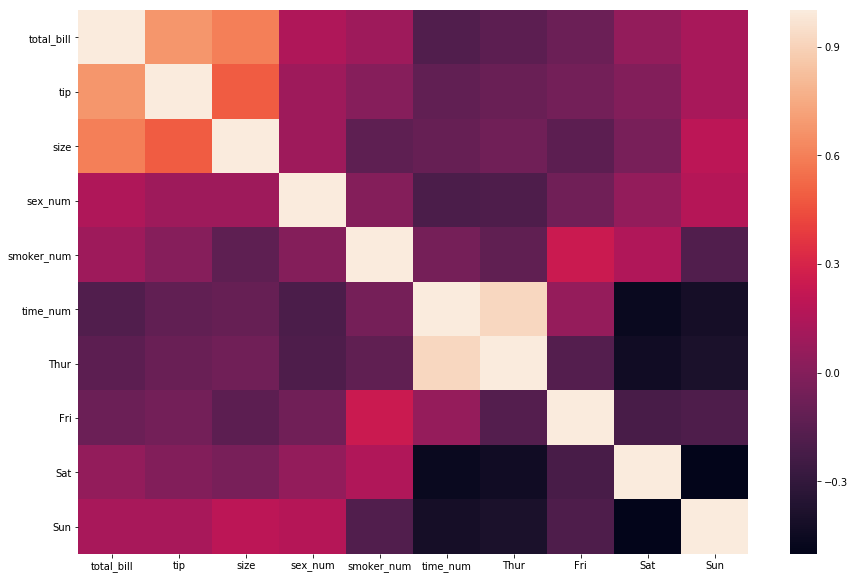

In [42]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.heatmap(df_new.corr())

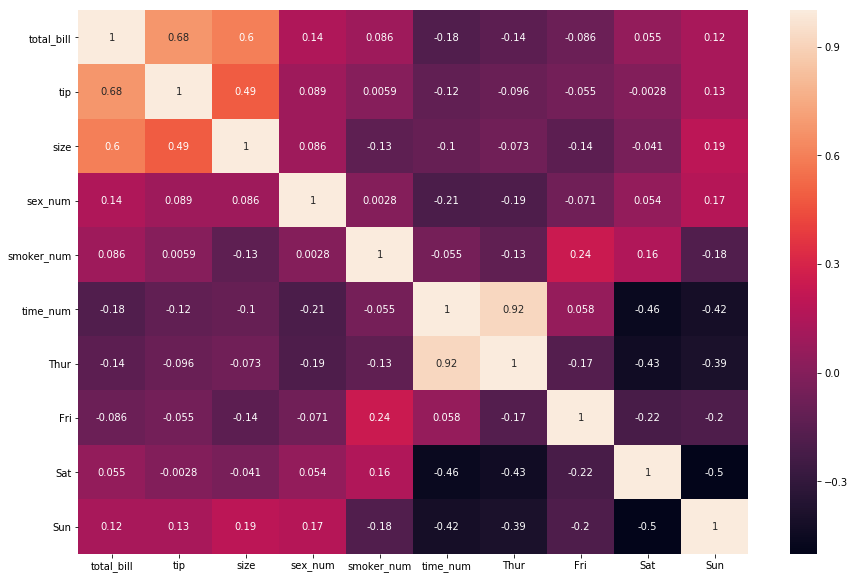

In [43]:
sns.heatmap(df_new.corr(), annot = True)

#### Adjusting the axis(measurements)

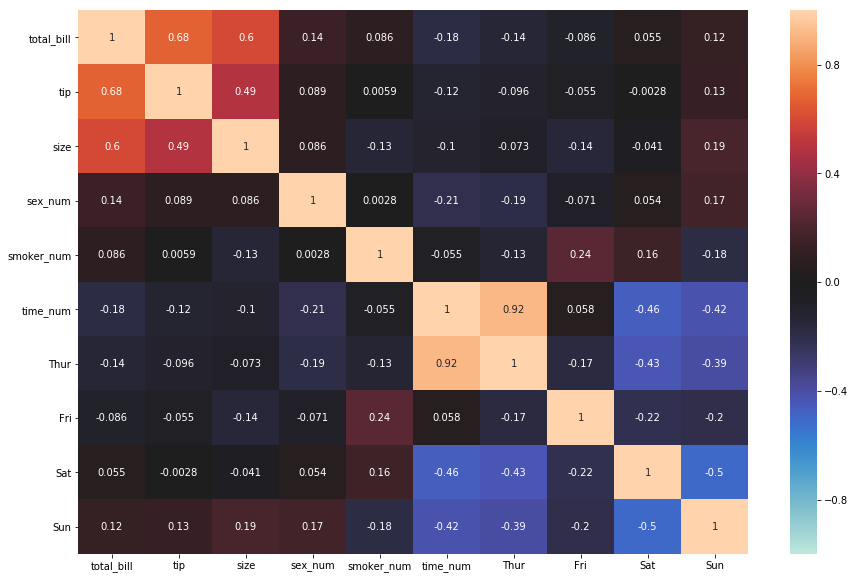

In [44]:
sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0)

#### Asthetics

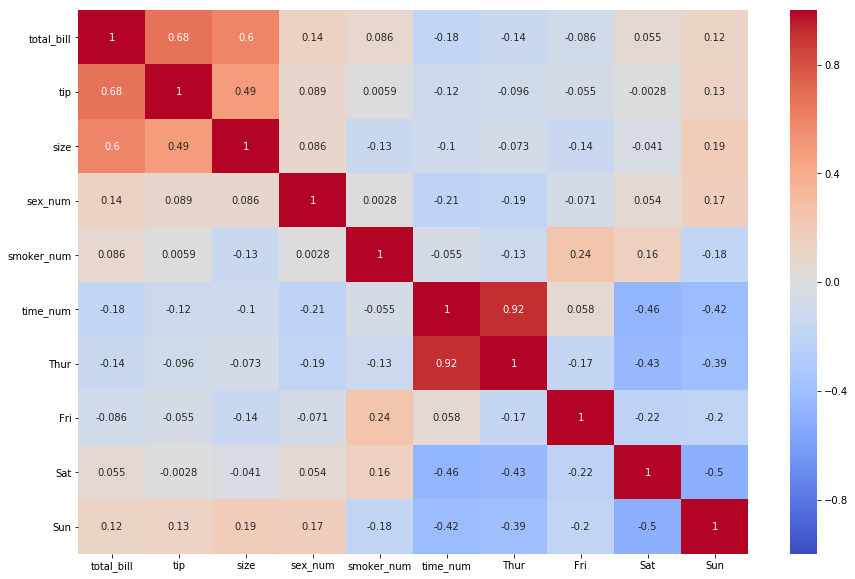

In [45]:
sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

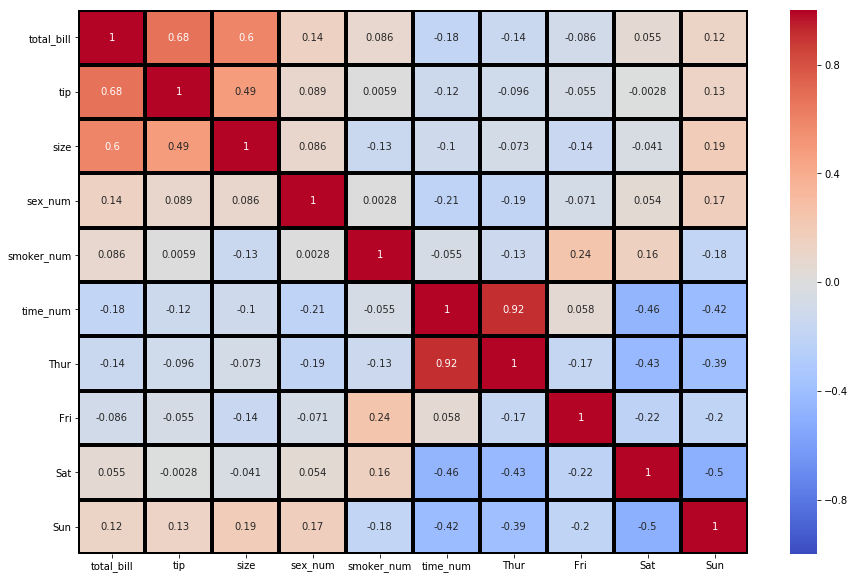

In [46]:
sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

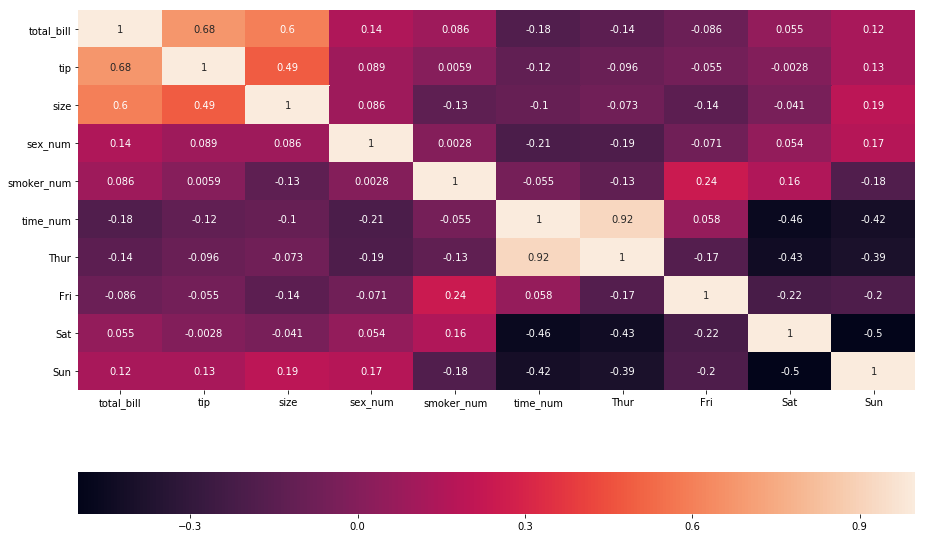

In [47]:
# plt.figure(figsize=(15, 10))
sns.heatmap(df_new.corr(), annot = True,  cbar_kws= {'orientation': 'horizontal'} )

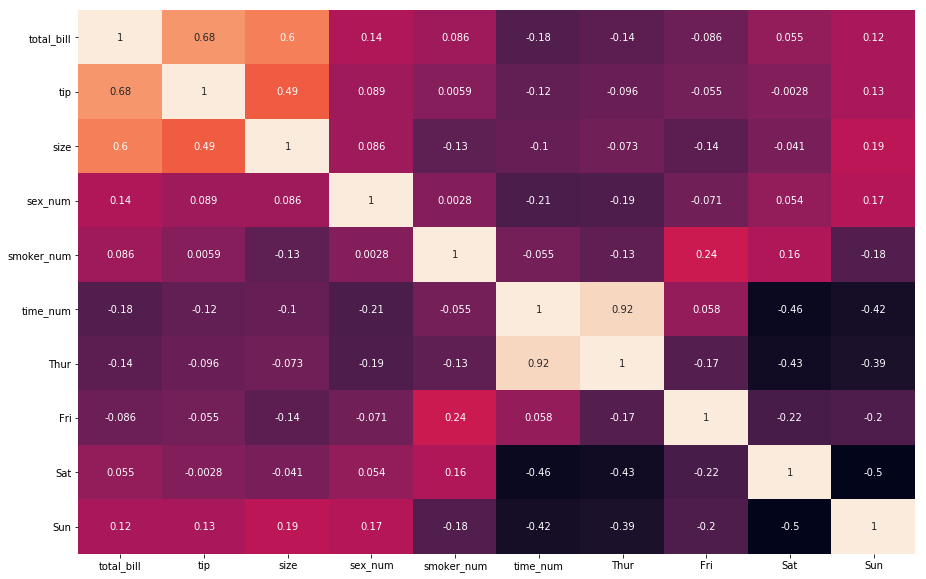

In [48]:
sns.heatmap(df_new.corr(), annot = True,  cbar=False)

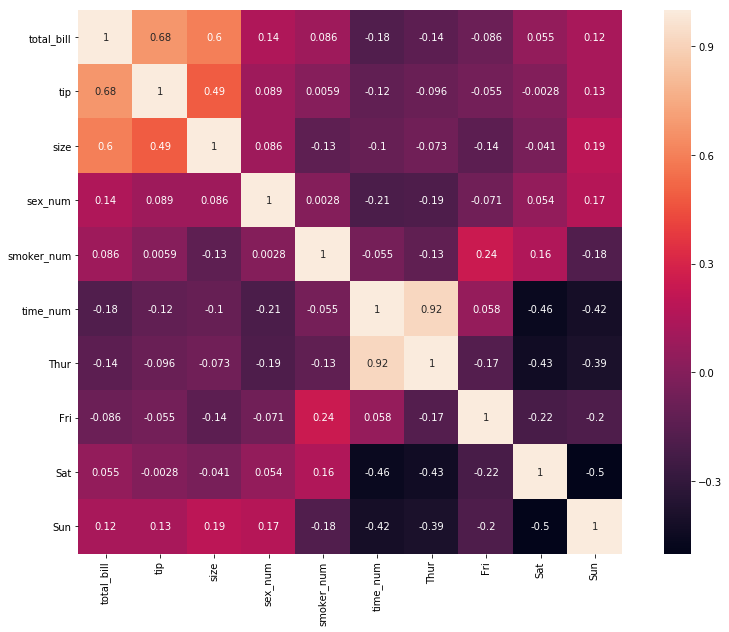

In [50]:
sns.heatmap(df_new.corr(), annot = True,square=True)

#### Changing the matrix shape

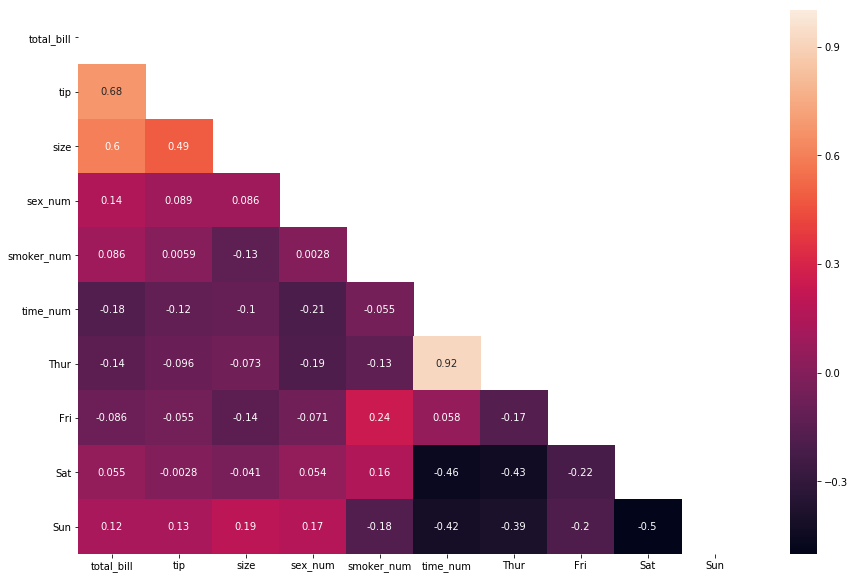

In [51]:
# plt.figure(figsize=(15, 10))
#matrix= np.zeros_like(new_df.corr())
#matrix[np.triu_indices_from(new_df.corr())] = True
matrix = np.triu(df_new.corr())
sns.heatmap(df_new.corr(), annot=True, mask=matrix)

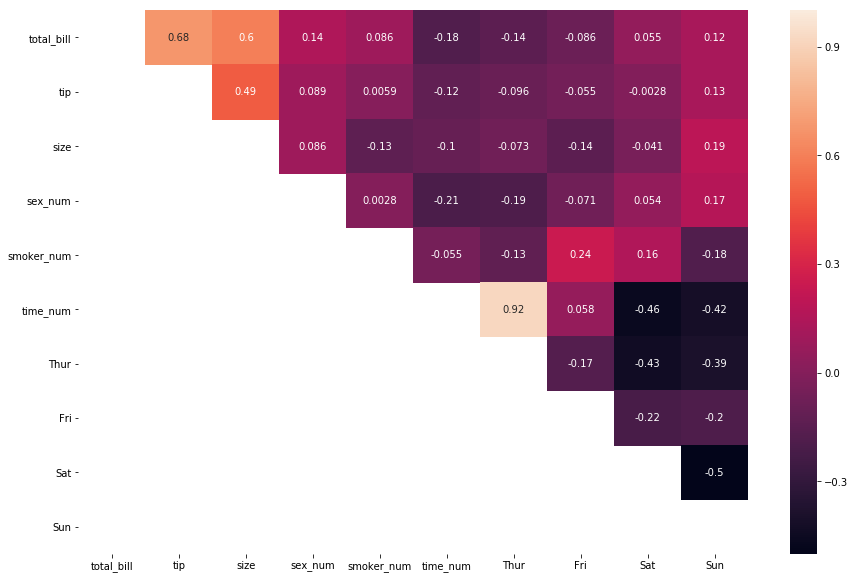

In [52]:
# plt.figure(figsize=(15, 10))
#matrix = np.ones_like(new_df.corr())
mask = np.tril(df_new.corr())
sns.heatmap(df_new.corr(), annot=True, mask=mask)